<a href="https://colab.research.google.com/github/Astarioashwi/Deep-Learning-Algo-for-Image-Classification/blob/main/Deep_Learning_Algo_Tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install kaggle

In [46]:
#configure the path of Kaggle.json file
!mkdir -p ~/.Kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [48]:
!cp /content/gdrive/My\ Drive/kaggle.json ~/.kaggle/kaggle.json


In [49]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [50]:
!ls

 0		    drive   'image resized'   sampleSubmission.csv   train
 dogs-vs-cats.zip   gdrive   sample_data      test1.zip		     train.zip


Extracting the compressed dataset

In [51]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The datset is extracted')


The datset is extracted


In [53]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The datset is extracted')

The datset is extracted


In [54]:
import os
#count the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of Images: ',file_count)

Number of Images:  25000


Print the name of Image


In [55]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.9888.jpg', 'cat.3282.jpg', 'dog.2989.jpg', 'dog.5500.jpg', 'cat.3912.jpg', 'dog.7849.jpg', 'dog.8651.jpg', 'dog.2193.jpg', 'cat.5854.jpg', 'dog.10739.jpg', 'dog.1365.jpg', 'cat.7369.jpg', 'cat.12050.jpg', 'cat.882.jpg', 'dog.1571.jpg', 'dog.8034.jpg', 'dog.9316.jpg', 'dog.6921.jpg', 'cat.1164.jpg', 'dog.7097.jpg', 'dog.575.jpg', 'dog.11316.jpg', 'cat.1968.jpg', 'cat.9068.jpg', 'dog.1359.jpg', 'cat.8074.jpg', 'dog.2313.jpg', 'dog.10191.jpg', 'cat.11181.jpg', 'cat.1832.jpg', 'cat.2909.jpg', 'cat.721.jpg', 'cat.1327.jpg', 'cat.8933.jpg', 'cat.628.jpg', 'dog.1345.jpg', 'cat.6988.jpg', 'cat.6912.jpg', 'cat.2790.jpg', 'dog.6726.jpg', 'dog.8537.jpg', 'cat.5190.jpg', 'cat.2136.jpg', 'dog.3924.jpg', 'dog.2542.jpg', 'dog.10988.jpg', 'cat.2101.jpg', 'dog.7358.jpg', 'cat.6804.jpg', 'cat.2633.jpg', 'cat.6434.jpg', 'dog.1573.jpg', 'dog.8417.jpg', 'dog.10215.jpg', 'dog.5735.jpg', 'dog.1915.jpg', 'dog.6263.jpg', 'dog.9086.jpg', 'dog.5099.jpg', 'cat.6059.jpg', 'cat.8748.jpg', 'dog.9175.jpg', 'cat

Importing the Dependies


In [56]:
 import numpy as np
 from PIL import Image
 import matplotlib.pyplot as plt
 import matplotlib.image as mpimg
 from sklearn.model_selection import train_test_split
 from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats


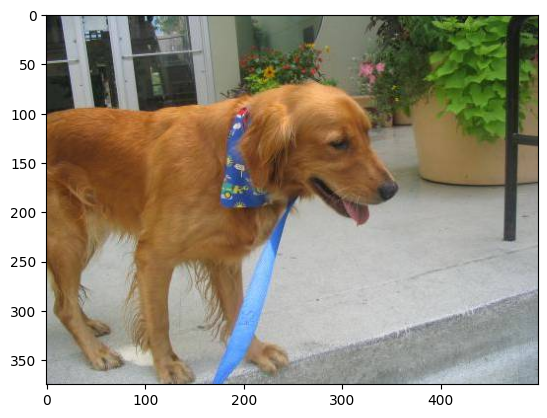

In [57]:
#Display dog image
img = mpimg.imread('/content/train/dog.8858.jpg')
imgplot = plt.imshow(img)
plt.show()


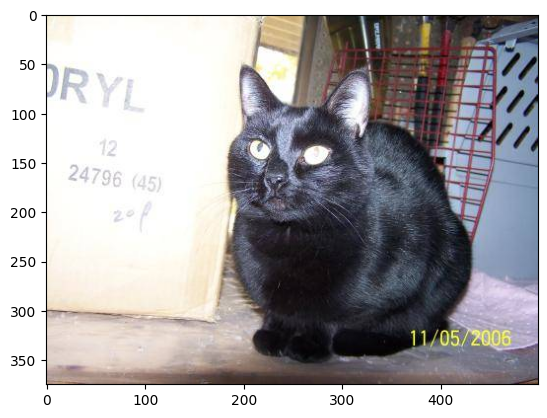

In [58]:
#Display catimage

img = mpimg.imread('/content/train/cat.10003.jpg')
imgplot = plt.imshow(img)
plt.show()


Resizing all the images


In [59]:
file_names = os.listdir('/content/train')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


cat
cat
dog
dog
cat


In [60]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count +=1

  else:
    cat_count +=1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)


Number of dog images = 12500
Number of cat images = 12500


Code to delete director and its content

In [61]:
#!rm -rf /content/image\ resized/*

In [62]:
#deleting a directory for resized images
#os.rmdir('/content/image resized')

In [63]:
os.mkdir('/content/image resized')


In [64]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

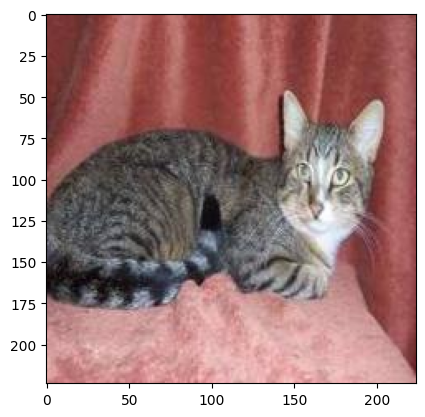

In [65]:
#Display resized cat image

img = mpimg.imread('/content/image resized/cat.10004.jpg')
imgplot = plt.imshow(img)
plt.show()


In [66]:
#Display dog resized image

#img = mpimg.imread('/content/image resized/dog.98765.jpg')
#imgplot = plt.imshow(img)
#plt.show()

Creating labels for resized images of dogs and cats

cat --> 0

dog --> 1

In [67]:
#creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label =='dog':
    labels.append(1)

  else:
    labels.append(0)

In [68]:
print(filenames[0:5])
print(len(filenames))

['cat.9888.jpg', 'cat.3282.jpg', 'dog.2989.jpg', 'dog.5500.jpg', 'cat.3912.jpg']
2000


In [69]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 0]
2000


In [70]:
#counting the images of out of __ images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1009  991]


Converting all the resized images to numpy arrays

In [71]:
import cv2
import glob

In [72]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dof_cat_image = np.asarray([cv2.imread(file) for file in files])

In [73]:
print(dof_cat_image)

[[[[151 151 151]
   [151 151 151]
   [149 149 149]
   ...
   [118 130 170]
   [115 127 167]
   [113 125 165]]

  [[149 149 149]
   [153 153 153]
   [157 157 157]
   ...
   [118 130 170]
   [117 129 169]
   [116 128 168]]

  [[146 146 146]
   [155 155 155]
   [165 165 165]
   ...
   [117 129 169]
   [115 127 167]
   [115 127 167]]

  ...

  [[161  73  37]
   [161  73  37]
   [161  73  37]
   ...
   [194  93  48]
   [194  93  48]
   [195  94  49]]

  [[161  68  35]
   [162  70  35]
   [161  71  36]
   ...
   [196  95  50]
   [196  95  50]
   [196  95  50]]

  [[163  68  35]
   [164  69  36]
   [165  73  38]
   ...
   [197  96  51]
   [197  96  51]
   [198  97  52]]]


 [[[213 186 166]
   [205 179 162]
   [201 176 160]
   ...
   [ 69  57  55]
   [ 66  54  52]
   [ 64  52  50]]

  [[212 185 165]
   [206 180 163]
   [203 178 162]
   ...
   [ 64  52  50]
   [ 62  50  48]
   [ 60  48  46]]

  [[211 184 164]
   [207 181 164]
   [206 181 165]
   ...
   [ 70  60  60]
   [ 70  58  58]
   [ 69  57

In [74]:
type (dof_cat_image)

numpy.ndarray

In [75]:
print(dof_cat_image.shape)

(2000, 224, 224, 3)


In [76]:
X = dof_cat_image
Y = np.asarray(labels)

Train Test Split

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [78]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [79]:
#scaling the data
X_train_scaled = X_train/225

X_test_scaled = X_test/225

Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

tf2-preview/mobilenet_v2/feature_vector


In [81]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape =(224,224,3), trainable = False)

In [86]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

                             ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [89]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

In [90]:
model.fit(X_train_scaled, Y_train, epochs =5)

Epoch 1/5
50/50 [==============================] - 77s 1s/step - loss: 0.1883 - acc: 0.9369
Epoch 2/5
50/50 [==============================] - 100s 2s/step - loss: 0.0815 - acc: 0.9750
Epoch 3/5
50/50 [==============================] - 97s 2s/step - loss: 0.0632 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 111s 2s/step - loss: 0.0520 - acc: 0.9819
Epoch 5/5
50/50 [==============================] - 110s 2s/step - loss: 0.0415 - acc: 0.9869


In [91]:
score, acc = model.evaluate(X_test_scaled, Y_test)

print('Test Loss = ', score)
print('Test Accuracy = ', acc)

13/13 [==============================] - 22s 2s/step - loss: 0.0818 - acc: 0.9675
Test Loss =  0.08178310096263885
Test Accuracy =  0.9674999713897705


Predictive System


Path of the image to be predicted: /content/07CAT-STRIPES-superJumbo.jpg


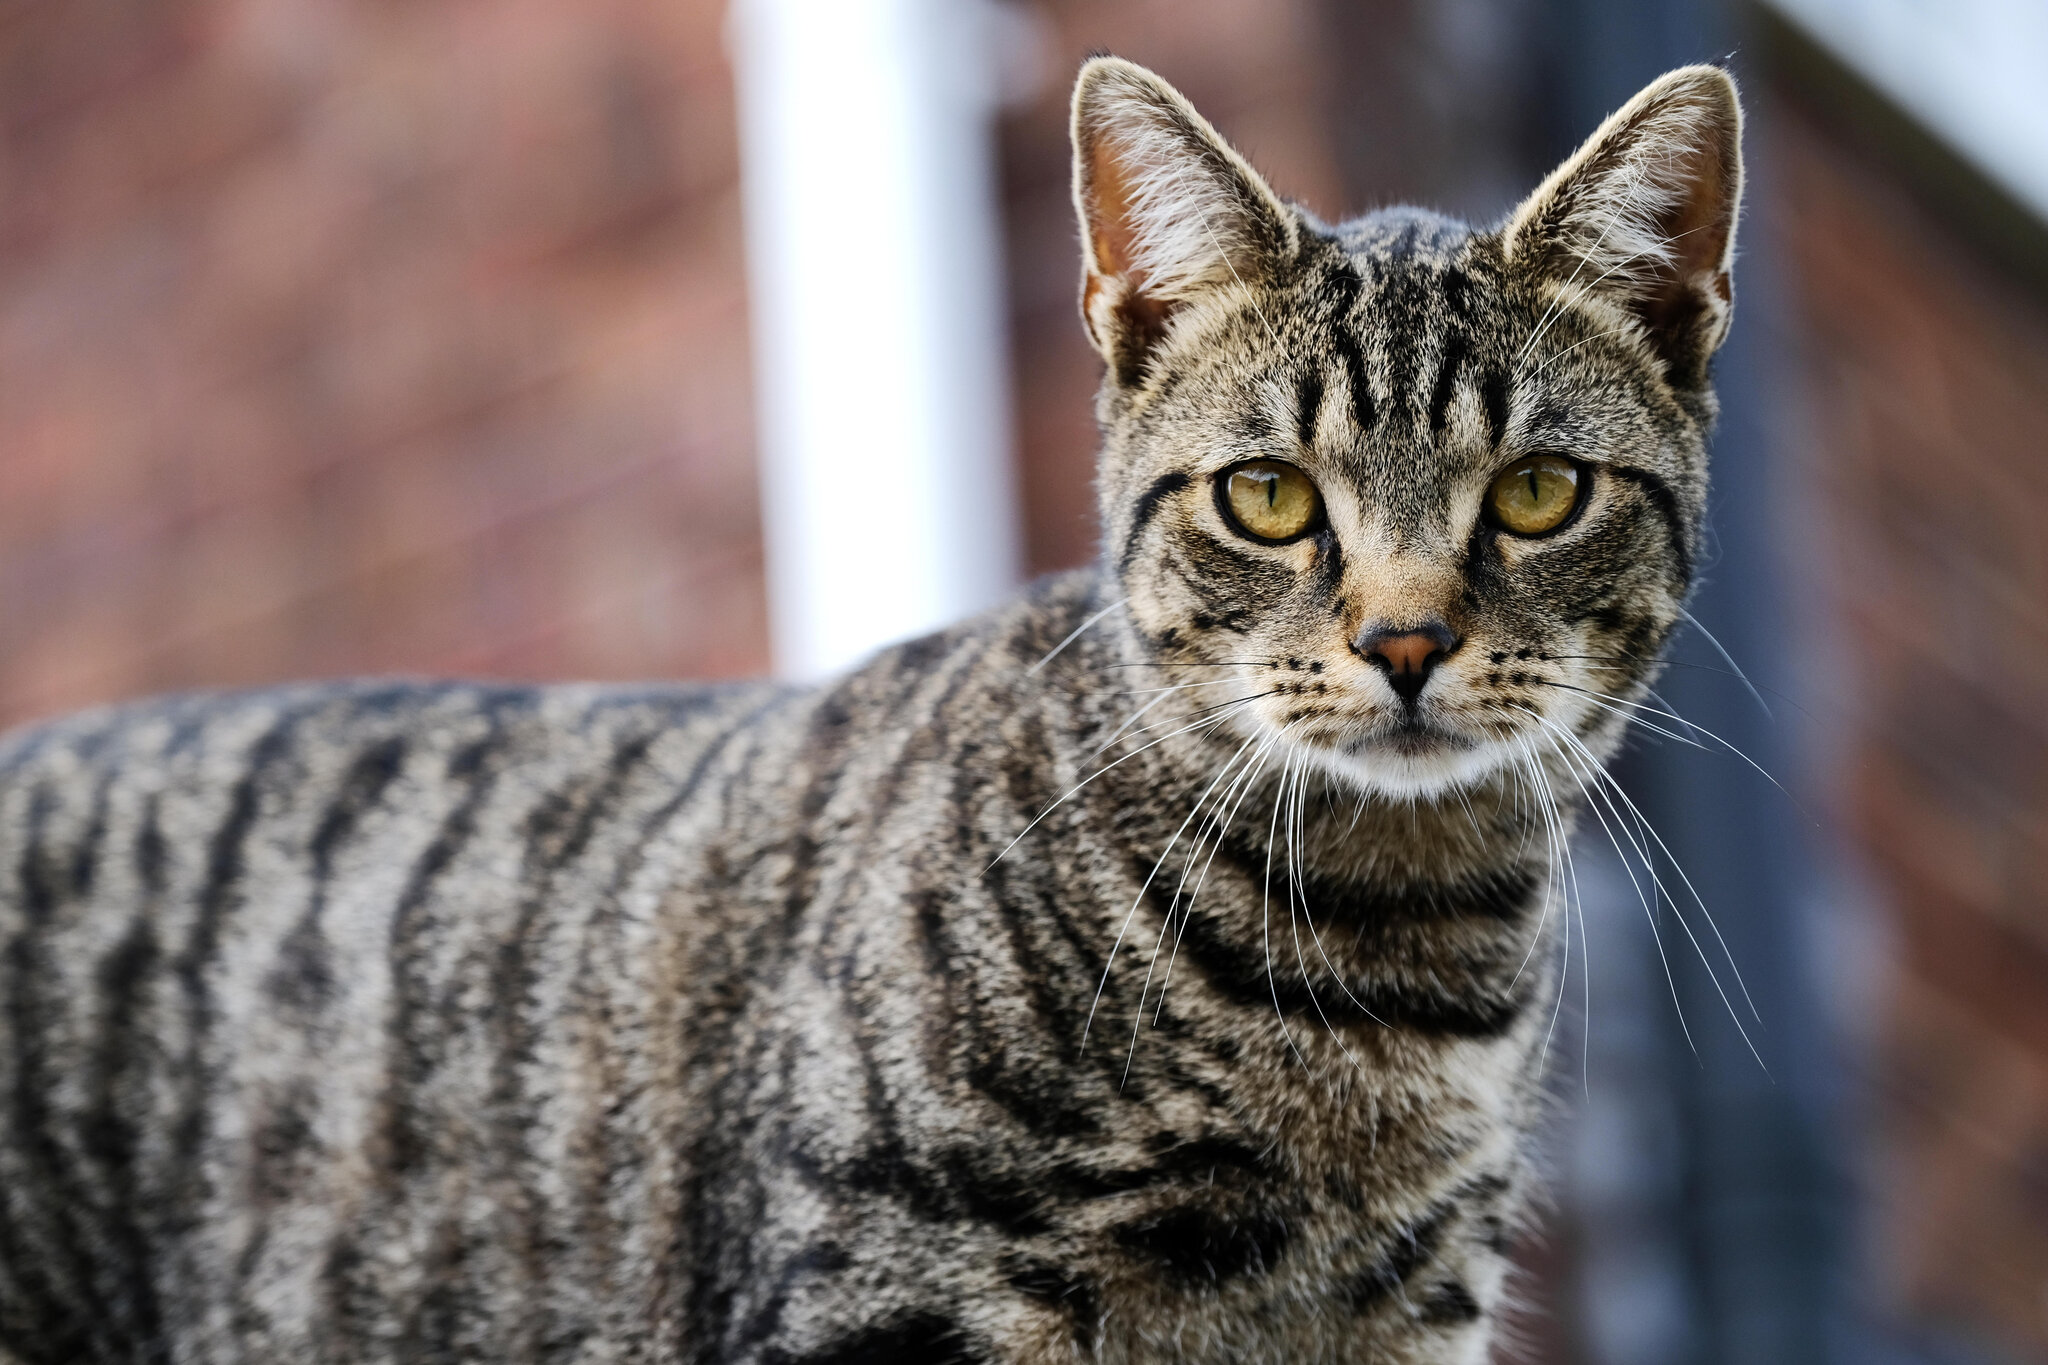

1/1 [==============================] - 0s 88ms/step
[[ 2.381168  -2.5996726]]
0
The image represents a Cat


In [98]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/225

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')
